# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [10]:
# pip install citipy

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [12]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [13]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                        "Lat": city_lat, 
                        "Lng": city_lng, 
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bangar
Processing Record 2 of Set 1 | san patricio
Processing Record 3 of Set 1 | amurzet
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | isafjordur
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | suzun
Processing Record 8 of Set 1 | utrik
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | madhupur
Processing Record 11 of Set 1 | ambon
Processing Record 12 of Set 1 | dudinka
Processing Record 13 of Set 1 | cabedelo
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | iqaluit
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | olonkinbyen
Processing Record 19 of Set 1 | besskorbnaya
Processing Record 20 of Set 1 | invercargill
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of Set 1 | taoudenni
Processing Record 23 of S

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bangar,16.8936,120.4243,21.21,67,96,1.87,PH,1706379493
1,san patricio,28.0170,-97.5169,19.39,60,42,7.86,US,1706379493
2,amurzet,47.6967,131.0981,-24.18,99,59,0.93,RU,1706379493
3,thompson,55.7435,-97.8558,-11.16,95,100,2.15,CA,1706379493
4,isafjordur,66.0755,-23.1240,-1.85,54,59,8.91,IS,1706379494


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bangar,16.8936,120.4243,21.21,67,96,1.87,PH,1706379493
1,san patricio,28.0170,-97.5169,19.39,60,42,7.86,US,1706379493
2,amurzet,47.6967,131.0981,-24.18,99,59,0.93,RU,1706379493
3,thompson,55.7435,-97.8558,-11.16,95,100,2.15,CA,1706379493
4,isafjordur,66.0755,-23.1240,-1.85,54,59,8.91,IS,1706379494


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

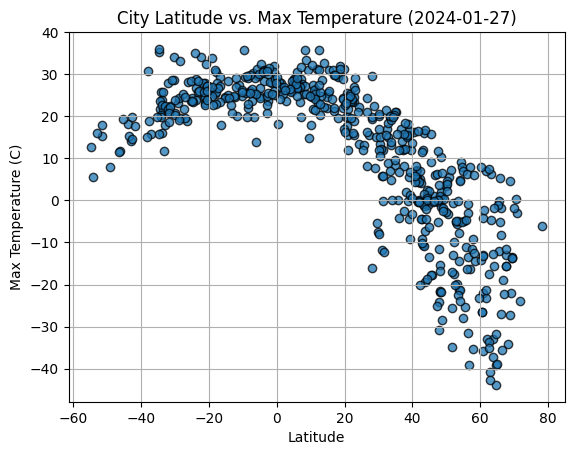

In [27]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
temperature = city_data_df["Max Temp"]

plt.scatter(latitude, temperature, alpha=0.75, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2024-01-27)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

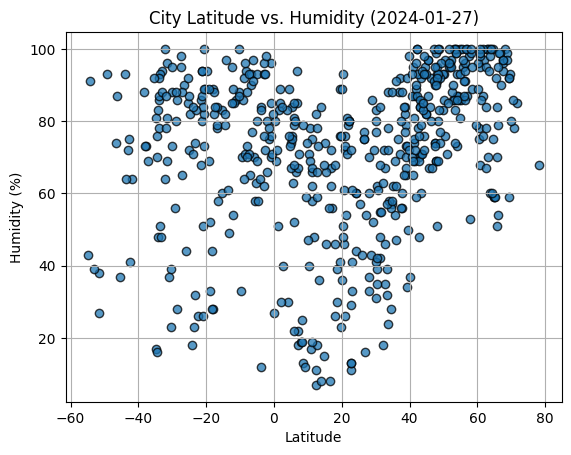

In [28]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df["Humidity"]

plt.scatter(latitude, humidity, alpha=0.75, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-01-27)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

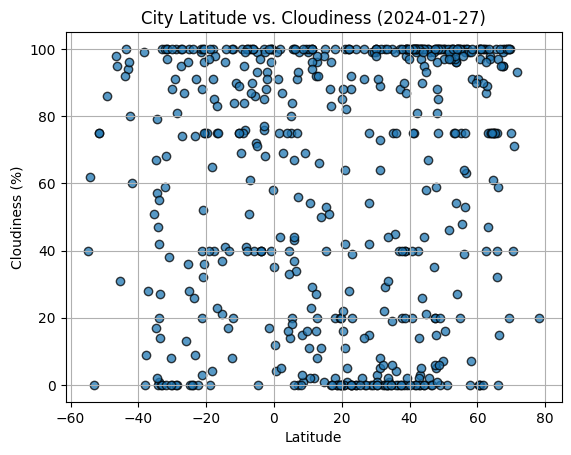

In [31]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df["Cloudiness"]

plt.scatter(latitude, cloudiness, alpha=0.75, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-01-27)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

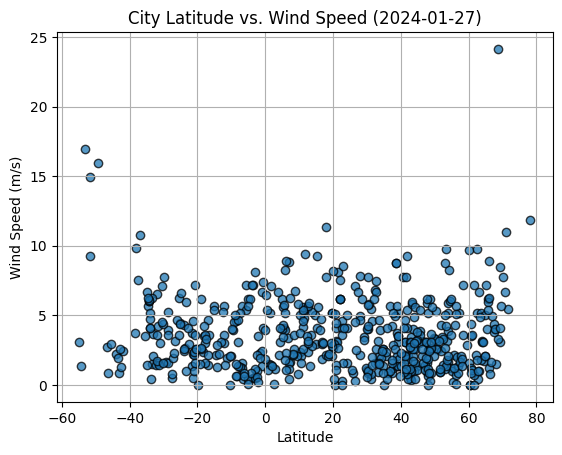

In [34]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df["Wind Speed"]

plt.scatter(latitude, wind_speed, alpha=0.75, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-01-27)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [66]:
# Define a function to create Linear Regression plots
def regression_plot(x_values, y_values, title, xlabel, ylabel, annot_xy, annot_text):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, xy=annot_xy, xytext=annot_text, fontsize=15,color="red")
    plt.title(str(title))
    plt.xlabel(str(xlabel))
    plt.ylabel(str(ylabel))
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [38]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bangar,16.8936,120.4243,21.21,67,96,1.87,PH,1706379493
1,san patricio,28.0170,-97.5169,19.39,60,42,7.86,US,1706379493
2,amurzet,47.6967,131.0981,-24.18,99,59,0.93,RU,1706379493
3,thompson,55.7435,-97.8558,-11.16,95,100,2.15,CA,1706379493
4,isafjordur,66.0755,-23.1240,-1.85,54,59,8.91,IS,1706379494


In [39]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,blackmans bay,-43.0167,147.3167,14.07,72,94,0.89,AU,1706379494
8,port-aux-francais,-49.3500,70.2167,7.85,93,86,15.93,TF,1706379495
10,ambon,-3.6954,128.1814,28.38,12,40,0.51,ID,1706379495
12,cabedelo,-6.9811,-34.8339,30.37,65,61,5.65,BR,1706379236
15,ushuaia,-54.8000,-68.3000,12.79,43,40,3.09,AR,1706379497


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.683616811433554


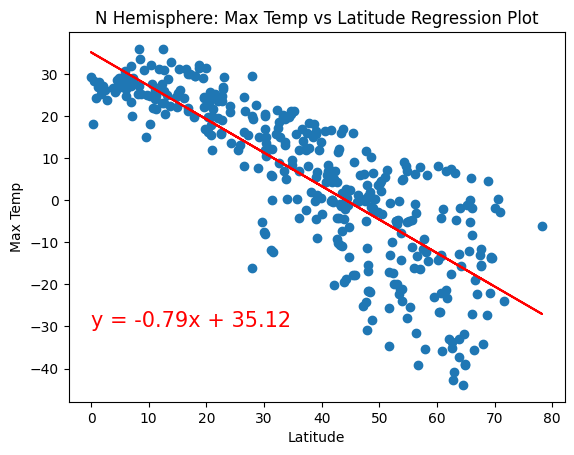

In [67]:
# Linear regression on Northern Hemisphere
regression_plot(northern_hemi_df["Lat"], 
                northern_hemi_df["Max Temp"], 
                "N Hemisphere: Max Temp vs Latitude Regression Plot", 
                "Latitude", 
                "Max Temp", 
                (1, 1), 
                (0, -30))

The r-squared is: 0.3300634230170997


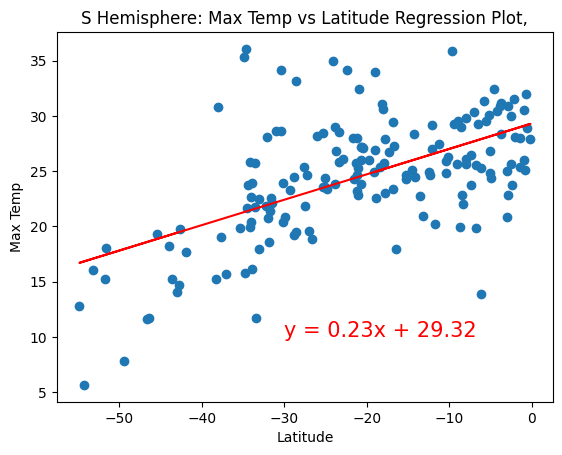

In [75]:
# Linear regression on Southern Hemisphere
regression_plot(southern_hemi_df["Lat"], 
                southern_hemi_df["Max Temp"], 
                "S Hemisphere: Max Temp vs Latitude Regression Plot,", 
                "Latitude", 
                "Max Temp", 
                (0, 25), 
                (-30, 10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.2825387637350065


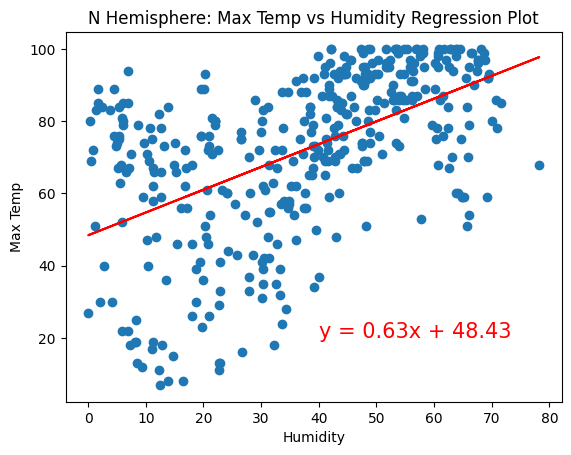

In [77]:
# Northern Hemisphere
regression_plot(northern_hemi_df["Lat"], 
                northern_hemi_df["Humidity"], 
                "N Hemisphere: Max Temp vs Humidity Regression Plot", 
                "Humidity", 
                "Max Temp", 
                (10, 60), 
                (40, 20))

The r-squared is: 0.036103022899765864


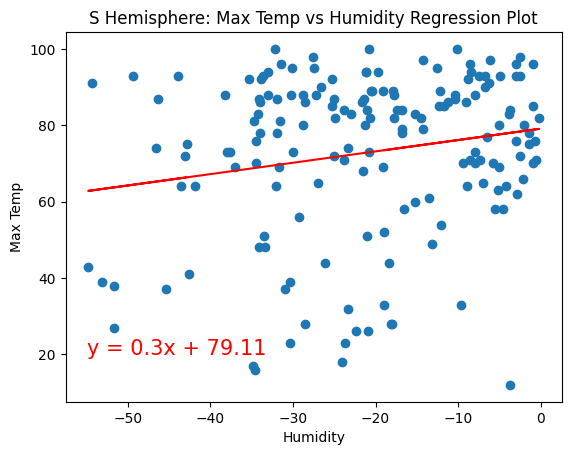

In [79]:
# Southern Hemisphere
regression_plot(southern_hemi_df["Lat"], 
                southern_hemi_df["Humidity"], 
                "S Hemisphere: Max Temp vs Humidity Regression Plot", 
                "Humidity", 
                "Max Temp", 
                (-10, 60), 
                (-55, 20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.06431399068708778


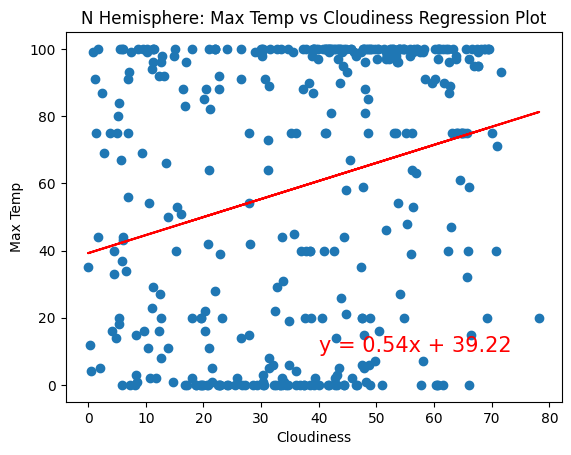

In [80]:
# Northern Hemisphere
regression_plot(northern_hemi_df["Lat"], 
                northern_hemi_df["Cloudiness"], 
                "N Hemisphere: Max Temp vs Cloudiness Regression Plot", 
                "Cloudiness", 
                "Max Temp", 
                (50, 60), 
                (40, 10))

The r-squared is: 0.04767696199942079


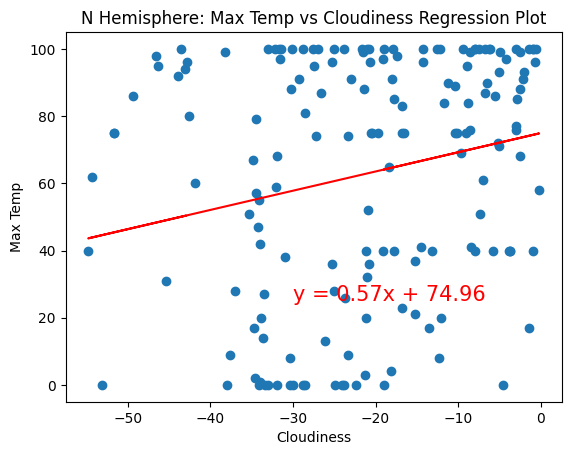

In [81]:
# Southern Hemisphere
regression_plot(southern_hemi_df["Lat"], 
                southern_hemi_df["Cloudiness"], 
                "S Hemisphere: Max Temp vs Cloudiness Regression Plot", 
                "Cloudiness", 
                "Max Temp", 
                (-10, 60), 
                (-30, 25))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 4.641109649660984e-06


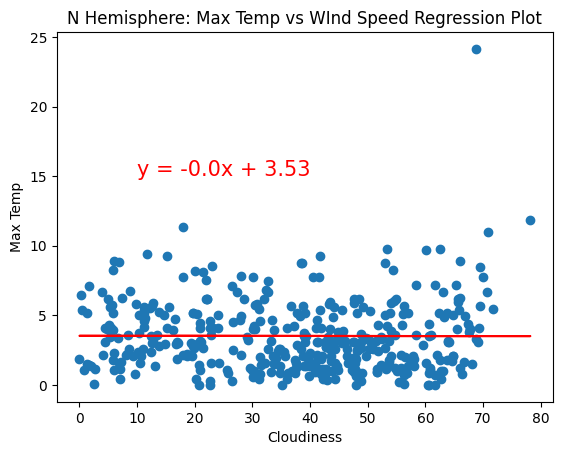

In [83]:
# Northern Hemisphere
regression_plot(northern_hemi_df["Lat"], 
                northern_hemi_df["Wind Speed"], 
                "N Hemisphere: Max Temp vs WInd Speed Regression Plot", 
                "Cloudiness", 
                "Max Temp", 
                (60, 4), 
                (10, 15))

The r-squared is: 0.08414789959299351


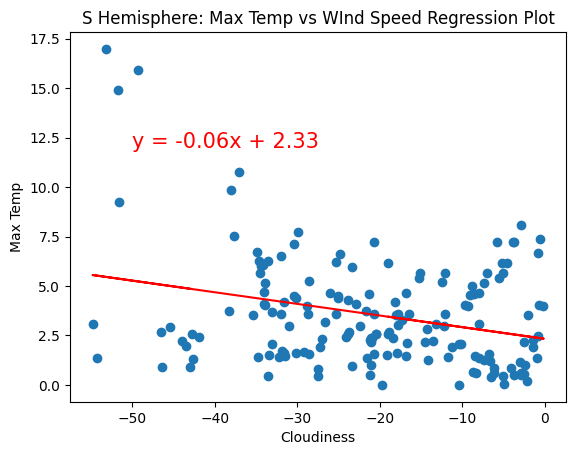

In [84]:
# Southern Hemisphere
regression_plot(southern_hemi_df["Lat"], 
                southern_hemi_df["Wind Speed"], 
                "S Hemisphere: Max Temp vs WInd Speed Regression Plot", 
                "Cloudiness", 
                "Max Temp", 
                (-20, 4), 
                (-50, 12))

**Discussion about the linear relationship:** YOUR RESPONSE HERE